In [1]:
import numpy as n
import pylab as pl
import os,h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator
%matplotlib inline

/Users/wiltbemj/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
os.chdir('/Users/wiltbemj/Dropbox/Python/MHDpy/')
import MHDpy

In [3]:
outdir = '/Users/wiltbemj/Downloads/MHDpy/'
outbase ='gem'
step = 1
hdf5Name = os.path.join(outdir,'%s-%06d.hdf5'%(outbase,step))
hdf5file = h5py.File(hdf5Name,'r')

In [4]:
Time = hdf5file.attrs['time']
NO = hdf5file.attrs['NO']
NO2 = NO/2

In [5]:
x = hdf5file["X"]
y = hdf5file["Y"]
z = hdf5file["Z"]

In [6]:
(xc,yc,zc,xi,yi,zi,xj,yj,zj,xk,yk,zk,dx,dy,dz)=MHDpy.Metrics(x,y,z,NO)

In [7]:
rho = hdf5file['Rho']
p = hdf5file['P']
vx = hdf5file['Vx']
vy = hdf5file['Vy']
vz = hdf5file['Vz']
bx = hdf5file['Bx']
by = hdf5file['By']
bz = hdf5file['Bz']
bi = hdf5file['Bi']
bj = hdf5file['Bj']
bk = hdf5file['Bk']
Ei = hdf5file['Ei']
Ej = hdf5file['Ej']
Ek = hdf5file['Ek']

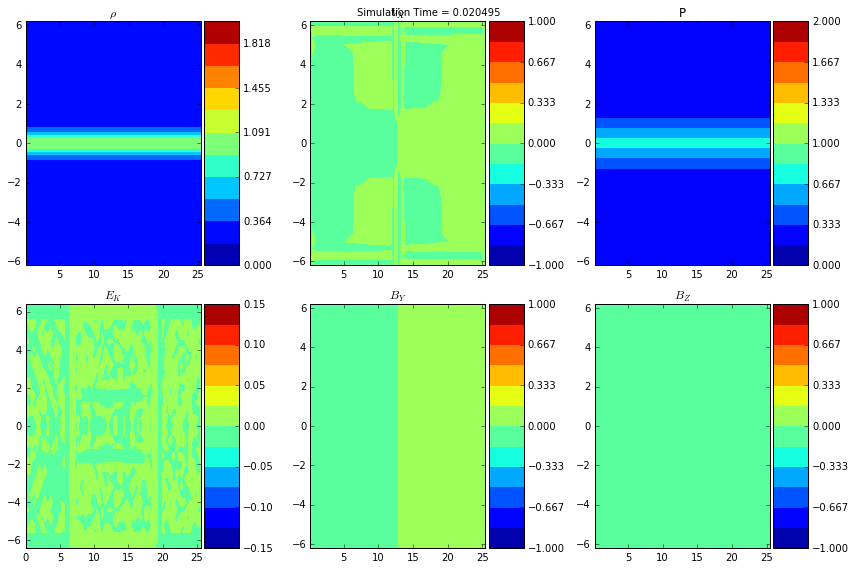

In [8]:
k=4
golden_mean = (n.sqrt(5)-1.0)/2.0
figwidth = 12
figheight = 8
fig,ax=pl.subplots(nrows=2,ncols=3,figsize=(figwidth,figheight))

levels = n.linspace(0,2,12)
cf0 = ax[0,0].contourf(xc[NO2:-NO2,NO2:-NO2,k],yc[NO2:-NO2,NO2:-NO2,k],
                    rho[NO2:-NO2,NO2:-NO2,k],levels)
divider0 = make_axes_locatable(ax[0,0])
cax0 = divider0.append_axes("right", size="20%", pad=0.05)
cbar0 = pl.colorbar(cf0,cax=cax0)
ax[0,0].set_title(r'$\rho$')

levels = n.linspace(-1.0,1.0,13)
cf1 = ax[0,1].contourf(xc[NO2:-NO2,NO2:-NO2,k],yc[NO2:-NO2,NO2:-NO2,k],
                    vx[NO2:-NO2,NO2:-NO2,k],levels)
divider1 = make_axes_locatable(ax[0,1])
cax1 = divider1.append_axes("right", size="20%", pad=0.05)
cbar1 = pl.colorbar(cf1,cax=cax1)
ax[0,1].set_title(r'$V_X$')

levels = n.linspace(0.0,2.0,13)
cf2 = ax[0,2].contourf(xc[NO2:-NO2,NO2:-NO2,k],yc[NO2:-NO2,NO2:-NO2,k],
                    p[NO2:-NO2,NO2:-NO2,k],levels)
divider2 = make_axes_locatable(ax[0,2])
cax2 = divider2.append_axes("right", size="20%", pad=0.05)
cbar2 = pl.colorbar(cf2,cax=cax2)
ax[0,2].set_title('P')

levels = n.linspace(-0.15,0.15,13)
cf3 = ax[1,0].contourf(x[NO2:-NO2,NO2:-NO2,k],y[NO2:-NO2,NO2:-NO2,k],
                    Ek[:,:,0],levels)
divider3 = make_axes_locatable(ax[1,0])
cax3 = divider3.append_axes("right", size="20%", pad=0.05)
cbar3 = pl.colorbar(cf3,cax=cax3)
ax[1,0].set_title(r'$E_K$')


levels = n.linspace(-1.0,1.0,13)
cf4 = ax[1,1].contourf(xc[NO2:-NO2,NO2:-NO2,k],yc[NO2:-NO2,NO2:-NO2,k],
                    by[NO2:-NO2,NO2:-NO2,k],levels)
divider4 = make_axes_locatable(ax[1,1])
cax4 = divider4.append_axes("right", size="20%", pad=0.05)
cbar4 = pl.colorbar(cf4,cax=cax4)
ax[1,1].set_title(r'$B_Y$')

levels = n.linspace(-1.0e-13,1.0e-13,13)
cf5 = ax[1,2].contourf(xc[NO2:-NO2,NO2:-NO2,k],yc[NO2:-NO2,NO2:-NO2,k],
                    bz[NO2:-NO2,NO2:-NO2,k],levels)
divider4 = make_axes_locatable(ax[1,2])
cax4 = divider4.append_axes("right", size="20%", pad=0.05)
cbar4 = pl.colorbar(cf4,cax=cax4)
ax[1,2].set_title(r'$B_Z$')
pl.tight_layout()
fig.suptitle('Simulation Time = %f' % Time)